## Convolutional Neural Network Using SVM as Final Layer

In [ ]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.4
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [ ]:
from zipfile import ZipFile
filename = "Datasets.zip"

with ZipFile(filename, 'r') as zip:
  zip.extractall()
  print('Done')

Done


In [ ]:
# Convolutional Neural Network

# Importing the libraries
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
tf.__version__

'2.5.0'

In [ ]:
# Part 1 - Data Preprocessing

# Preprocessing the Training set
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)


In [ ]:
training_set = train_datagen.flow_from_directory('/content/Datasets/Train',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

# Preprocessing the Test set
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory('/content/Datasets/Test',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 64 images belonging to 3 classes.
Found 58 images belonging to 3 classes.


In [ ]:
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Dense

In [ ]:
from tensorflow.keras.regularizers import l2

In [ ]:
# Part 2 - Building the CNN
# Initialising the CNN
cnn = tf.keras.models.Sequential()

# Step 1 - Convolution
cnn.add(tf.keras.layers.Conv2D(filters=32,padding="same",kernel_size=3, activation='relu', strides=2, input_shape=[64, 64, 3]))

# Step 2 - Pooling
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

# Adding a second convolutional layer
cnn.add(tf.keras.layers.Conv2D(filters=32,padding='same',kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

# Step 3 - Flattening
cnn.add(tf.keras.layers.Flatten())

# Step 4 - Full Connection
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

# Step 5 - Output Layer
cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))
# For Binary Classification
#cnn.add(Dense(1, kernel_regularizer=tf.keras.regularizers.l2(0.01),activation='linear'))


### for mulitclassification
cnn.add(Dense(3, kernel_regularizer=tf.keras.regularizers.l2(0.01),activation ='softmax'))
cnn.compile(optimizer = 'adam', loss = 'squared_hinge', metrics = ['accuracy'])

In [ ]:
## for mulitclassification
## cnn.add(Dense(3, kernel_regularizer=tf.keras.regularizers.l2(0.01),activation ='softmax'))
## cnn.compile(optimizer = 'adam', loss = 'squared_hinge', metrics = ['accuracy'])

In [ ]:
cnn.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 32)        9248      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 2048)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               262272    
_________________________________________________________________
dense_4 (Dense)              (None, 1)                

In [ ]:
# Part 3 - Training the CNN

# Compiling the CNN
cnn.compile(optimizer = 'adam', loss = 'hinge', metrics = ['accuracy'])

# Training the CNN on the Training set and evaluating it on the Test set
r=cnn.fit(x = training_set, validation_data = test_set, epochs = 15)

Epoch 1/15
2/2 [==============================] - 1s 371ms/step - loss: 0.6479 - accuracy: 0.4219 - val_loss: 0.6165 - val_accuracy: 0.3103
Epoch 2/15
2/2 [==============================] - 0s 182ms/step - loss: 0.6479 - accuracy: 0.3906 - val_loss: 0.6164 - val_accuracy: 0.3103
Epoch 3/15
2/2 [==============================] - 0s 185ms/step - loss: 0.6478 - accuracy: 0.3750 - val_loss: 0.6164 - val_accuracy: 0.3103
Epoch 4/15
2/2 [==============================] - 0s 183ms/step - loss: 0.6478 - accuracy: 0.3750 - val_loss: 0.6163 - val_accuracy: 0.3103
Epoch 5/15
2/2 [==============================] - 0s 171ms/step - loss: 0.6477 - accuracy: 0.3750 - val_loss: 0.6162 - val_accuracy: 0.3103
Epoch 6/15
2/2 [==============================] - 0s 187ms/step - loss: 0.6477 - accuracy: 0.3906 - val_loss: 0.6162 - val_accuracy: 0.3103
Epoch 7/15
2/2 [==============================] - 0s 179ms/step - loss: 0.6476 - accuracy: 0.4062 - val_loss: 0.6161 - val_accuracy: 0.3103
Epoch 8/15
2/2 [====

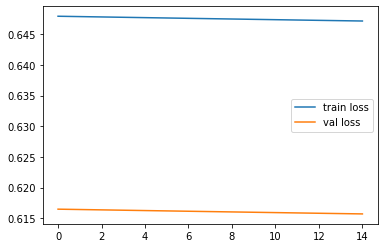

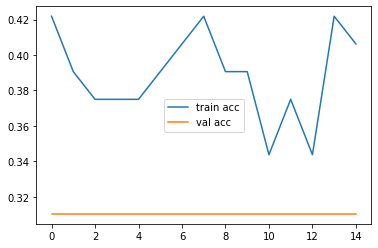

<Figure size 432x288 with 0 Axes>

In [ ]:
# plot the loss
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
# save it as a h5 file


from tensorflow.keras.models import load_model

cnn.save('model_rcat_dog.h5')

In [ ]:
from tensorflow.keras.models import load_model
 
# load model
model = load_model('model_rcat_dog.h5')

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 32)        9248      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 2048)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               262272    
_________________________________________________________________
dense_4 (Dense)              (None, 1)                

In [ ]:
# Part 4 - Making a single prediction

import numpy as np
from tensorflow.keras.preprocessing import image
test_image = image.load_img('/content/Datasets/Test/mercedes/32.jpg', target_size = (64,64))
test_image = image.img_to_array(test_image)
test_image=test_image/255
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)

In [ ]:
result

array([[0.3345947 , 0.3308102 , 0.33459514]], dtype=float32)

In [ ]:
# Part 4 - Making a single prediction

import numpy as np
from tensorflow.keras.preprocessing import image
test_image = image.load_img('/content/Datasets/Test/lamborghini/10.jpg', target_size = (64,64))
test_image = image.img_to_array(test_image)
test_image=test_image/255
test_image = np.expand_dims(test_image, axis = 0)
result = max(cnn.predict(test_image))

In [ ]:
result

array([[0.33459726, 0.33080515, 0.33459756]], dtype=float32)

In [ ]:
a=np.argmax(result, axis=1)
print(a)

[2]


In [ ]:

if (a==0):
  print("The predicted class is Audi")
elif (a==1):
  print("The predicted class is Lamborghini")
else:
  print("The predicted class is Mercedes")
    

The predicted class is Mercedes
